# # THE SPARKS FOUNDATION : DATA SCIENCE AND BUSINESS ANALYTICS

TASK 1 : PREDICTION USING SUPERVISED ML

AIM: Predict the percentage of a student based on the number of study hours.
LANGUAGE USED: python 3
IDE : Jupyter Notebook
TYPE : Linear Regression
AUTHOR : KOTHAMASU.DHEERA NAGA YASHWANTH


   STEPS TO BE FOLLOWED
 STEP 1: Import the dataset
 STEP 2: Visualize and Analysis the Dataset
 STEP 3: Prepare the Data
 STEP 4: Design and Train the Machine Lerning Model
 STEP 5: Visualize the Model
 STEP 6: Make Predictions
 STEP 7: Evaluate the Model
 


STEP 1: IMPORT DATASET

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Reading data from remort link using url

url="http://bit.ly/w-data"
student_data = pd.read_csv(url)

print("Data imported successfully")
student_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
student_data.shape

#Here we can see that there are 2 rows and 3 cololoumns in the dataset

(25, 2)

In [6]:
student_data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
student_data.isnull().sum()

#Here we can see that there are no NULL values in the dataset that can affect the teraining of algorithm.

Hours     0
Scores    0
dtype: int64

STEP 2 : VISUIALIZE AND ANALYZE THE DATASET

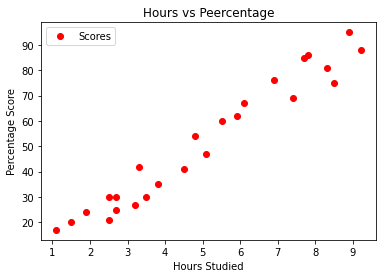

In [9]:
# Plotting the distribution of scores and number of hours studied on a 2D graph

student_data.plot(x='Hours',y='Scores',style='ro')
plt.title("Hours vs Peercentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


STEP 3: PREPARE THE DATA

In [11]:
# we are extracting values of Hours data into variable X and the values of Scores Data into Variable Y


X=student_data.iloc[:,:-1].values
Y=student_data.iloc[:,1].values

In [12]:
#Number of hours studied
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
#Scores Obtained
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [15]:
#we now split the data into train and test datasets using Scikit-learn's built-in train_test_split()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,
                                  test_size=0.2,random_state=0)

In [16]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [17]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
Y_train


array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [19]:
Y_test

array([20, 27, 69, 30, 62], dtype=int64)

STEP 4: DESIGN AND TRAIN THE MACHINE LEARNING MODEL

In [20]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,Y_train)

print("Training complete")

Training complete


STEP 5 : VISUALIZE THE MODEL


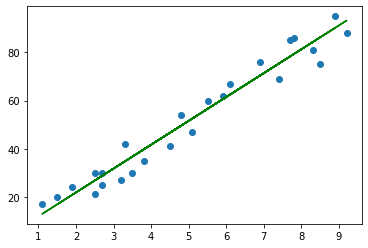

In [22]:
#plotting the regression line
line=regressor.coef_*X+regressor.intercept_

# plotting for the testdata
plt.scatter(X,Y)
plt.plot(X,line,color="green");
plt.show()

STEP 6: MAKING PREDICTIONS

In [24]:
print(X_test) #Testing data - In Hours
Y_pred=regressor.predict(X_test) #Predicting the Scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
# Comparing Actual vs Predicted
df=pd.DataFrame({"Actual":Y_test,"Predicted":Y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
# Testing with custom data of 9.25hrs/day

hours = 9.25
own_pred = regressor.predict([[hours]])
print(f"No of Hours = {hours}")
print(f"Predicted score = {own_pred[0]}")

No of Hours = 9.25
Predicted score = 93.69173248737538


STEP 7: EVALUATE THE MODEL

It is important to evaluate the performance of algorithm to compare how well different algorithms perform on a particular dataset.


MEAN ABSOLUTE ERROR


In [27]:
from sklearn import metrics

print("mean absolute error:",metrics.mean_absolute_error(Y_test,Y_pred))

mean absolute error: 4.183859899002975



MAX ERROR


In [28]:
print("Max Error:",metrics.max_error(Y_test,Y_pred))

Max Error: 6.732260779489842



MEAN SQUARED ERROR


In [29]:
print("Mean Squared error:",metrics.mean_squared_error(Y_test,Y_pred))

Mean Squared error: 21.5987693072174
